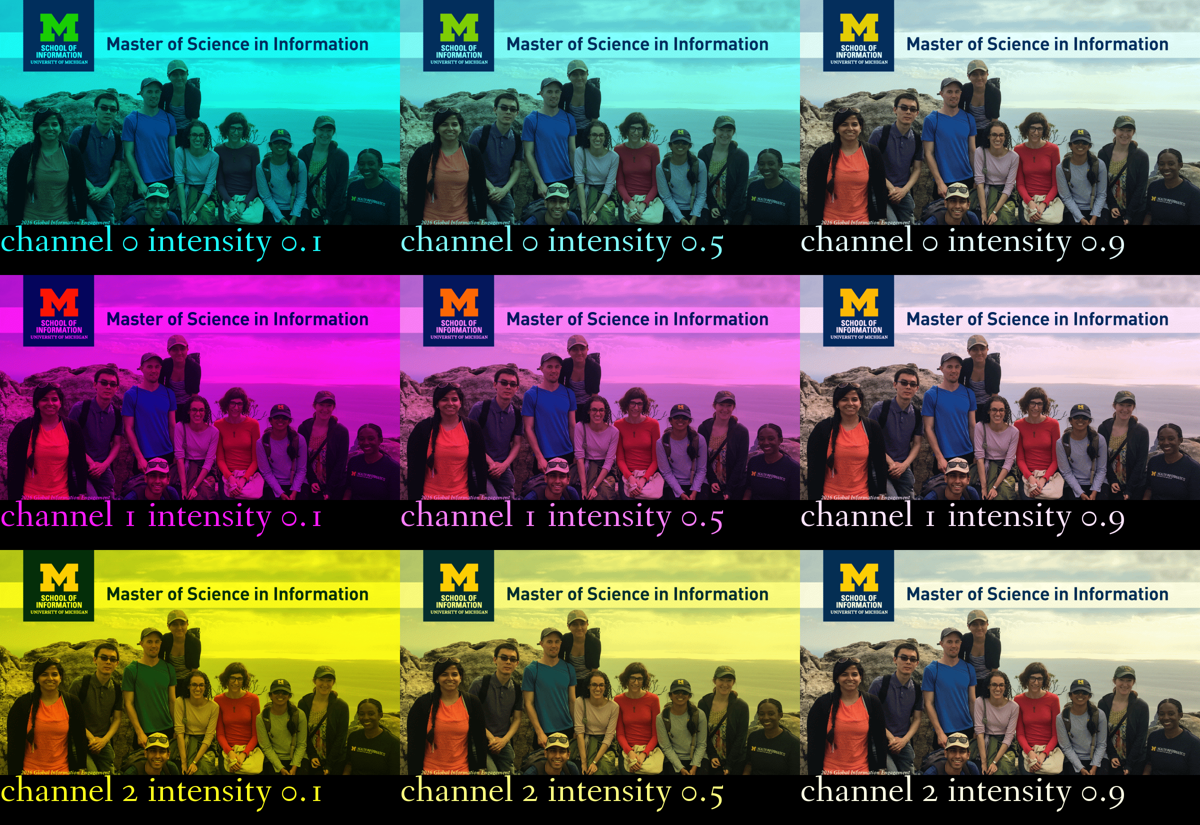

In [48]:
import PIL
from PIL import Image
from PIL import ImageEnhance
from PIL import ImageDraw
from PIL import ImageFont


# read image and convert to RGB
image=Image.open("readonly/msi_recruitment.gif")
image=image.convert('RGB')


#define the font to use
font=ImageFont.truetype("readonly/fanwood-webfont.ttf",75)

# create a text box to write the text on
text_box=Image.new('RGB', (image.width,image.height+100), color='black')
text_box.paste(image, (0,0))



images=[]

n=0.1
for i in range(3):
    im=text_box.copy()#create a copy of the text box
    draw=ImageDraw.Draw(im)
    #write on the image
    draw.text((0,image.height+10), "channel 0 intensity {}".format(n), font=font)
    #modify the channel intensity
    r,g,b=im.split()
    images.append(Image.merge("RGB",(r.point(lambda x: x*n),g,b)))
    n+=0.4 
n=0.1
for i in range(3):
    im=text_box.copy()
    draw=ImageDraw.Draw(im)
    draw.text((0,image.height+10), "channel 1 intensity {}".format(n), font=font)
    r,g,b=im.split()
    images.append(Image.merge("RGB",(r,g.point(lambda x: x*n),b)))
    n+=0.4  
n=0.1
for i in range(3):
    im=text_box.copy()
    draw=ImageDraw.Draw(im)
    draw.text((0,image.height+10), "channel 2 intensity {}".format(n), font=font)
    r,g,b=im.split()
    images.append(Image.merge("RGB",(r,g,b.point(lambda x: x*n))))
    n+=0.4


    

# create a contact sheet from different color intensities
first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
x=0
y=0

for img in images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)